## 模型与数据加载

In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from data_process.dnn_dataprocess import train_x, train_y, test_x, test_y, val_x, val_y, pos_train_xs, pos_train_ys
from mlp import MLP, auc

## 模型训练

In [2]:
# 创建一个 MLP 实例
mlp = MLP(input_size=train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll, ll_val, aa, aa_val = mlp.train(train_x, train_y, val_x, val_y, lr=0.01, epochs=140, batch_size=2048)


Epoch 1/140, loss: 48.9318, acc: 0.9353, val_loss: 49.2810, val_acc : 0.8843
Epoch 2/140, loss: 48.3855, acc: 0.9508, val_loss: 48.8829, val_acc : 0.7867
Epoch 3/140, loss: 47.8762, acc: 0.9521, val_loss: 48.6661, val_acc : 0.7662
Epoch 4/140, loss: 47.3714, acc: 0.9535, val_loss: 48.3680, val_acc : 0.7465
Epoch 5/140, loss: 46.8787, acc: 0.9549, val_loss: 47.9787, val_acc : 0.7362
Epoch 6/140, loss: 46.4008, acc: 0.9567, val_loss: 47.4951, val_acc : 0.7357
Epoch 7/140, loss: 45.9316, acc: 0.9593, val_loss: 46.9651, val_acc : 0.7378
Epoch 8/140, loss: 45.4687, acc: 0.9607, val_loss: 46.4584, val_acc : 0.7300
Epoch 9/140, loss: 45.0125, acc: 0.9617, val_loss: 45.9730, val_acc : 0.7297
Epoch 10/140, loss: 44.5633, acc: 0.9630, val_loss: 45.4852, val_acc : 0.7298
Epoch 11/140, loss: 44.1206, acc: 0.9646, val_loss: 45.0091, val_acc : 0.7259
Epoch 12/140, loss: 43.6834, acc: 0.9654, val_loss: 44.5526, val_acc : 0.7240
Epoch 13/140, loss: 43.2515, acc: 0.9663, val_loss: 44.0934, val_acc : 0.

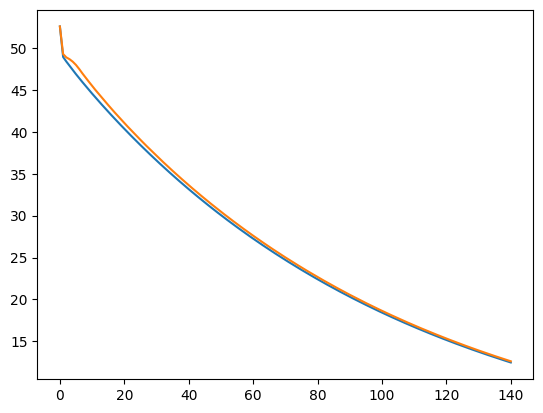

In [3]:
plt.plot(ll)
plt.plot(ll_val)

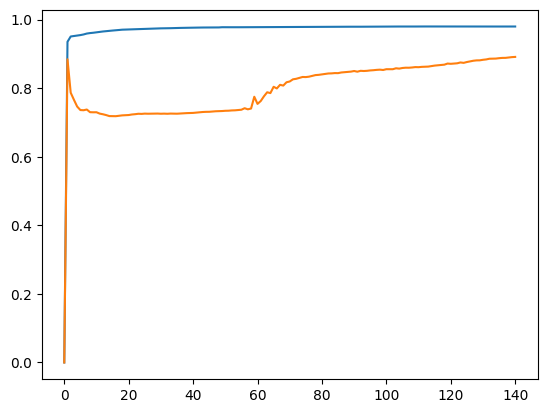

In [4]:
plt.plot(aa)
plt.plot(aa_val)

In [5]:
y_test_pred = mlp.predict(test_x)
test_acc = auc(test_y, y_test_pred)
test_loss = mlp.BCELoss(mlp.forward(test_x), test_y)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 79.08%
Test Loss: 12.8517


## 投毒攻击

In [6]:
ll_poisons = []
ll_val_poisons = []
aa_poisons = []
aa_val_poisons = []
pos_acc = []
pos_acc.append(test_acc)

In [7]:
# 再创建一个 MLP 实例
mlp_poison_2 = MLP(input_size=pos_train_xs[0].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_2.train(pos_train_xs[0], pos_train_ys[0], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 48.2391, acc: 0.8943, val_loss: 49.8332, val_acc : 0.6580
Epoch 2/140, loss: 47.5679, acc: 0.9444, val_loss: 49.1432, val_acc : 0.7085
Epoch 3/140, loss: 47.0814, acc: 0.9441, val_loss: 48.6214, val_acc : 0.7285
Epoch 4/140, loss: 46.6044, acc: 0.9447, val_loss: 48.1150, val_acc : 0.7449
Epoch 5/140, loss: 46.1385, acc: 0.9503, val_loss: 47.6151, val_acc : 0.7536
Epoch 6/140, loss: 45.6807, acc: 0.9512, val_loss: 47.1349, val_acc : 0.7578
Epoch 7/140, loss: 45.2281, acc: 0.9535, val_loss: 46.6620, val_acc : 0.7605
Epoch 8/140, loss: 44.7807, acc: 0.9528, val_loss: 46.1985, val_acc : 0.7630
Epoch 9/140, loss: 44.3384, acc: 0.9523, val_loss: 45.7409, val_acc : 0.7653
Epoch 10/140, loss: 43.9010, acc: 0.9520, val_loss: 45.2904, val_acc : 0.7670
Epoch 11/140, loss: 43.4683, acc: 0.9528, val_loss: 44.8424, val_acc : 0.7693
Epoch 12/140, loss: 43.0401, acc: 0.9528, val_loss: 44.4011, val_acc : 0.7708
Epoch 13/140, loss: 42.6169, acc: 0.9535, val_loss: 43.9609, val_acc : 0.

In [8]:
y_pos_test_pred_0 = mlp_poison_2.predict(test_x)
test_acc_0 = auc(test_y, y_pos_test_pred_0)
test_loss_0 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_0)
print("Test Accuracy of 2% poison: {:.2f}%".format(test_acc_0 * 100))
print(f"Test Loss of 2% poison: {test_loss_0:.4f}")

Test Accuracy of 2% poison: 76.66%
Test Loss of 2% poison: 12.8517


In [9]:
# 再创建一个 MLP 实例
mlp_poison_4 = MLP(input_size=pos_train_xs[1].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_4.train(pos_train_xs[1], pos_train_ys[1], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 49.9688, acc: 0.8812, val_loss: 51.5903, val_acc : 0.5022
Epoch 2/140, loss: 49.3951, acc: 0.8997, val_loss: 51.1550, val_acc : 0.4789
Epoch 3/140, loss: 48.8463, acc: 0.9213, val_loss: 50.6691, val_acc : 0.4651
Epoch 4/140, loss: 48.3260, acc: 0.9269, val_loss: 50.0753, val_acc : 0.4762
Epoch 5/140, loss: 47.8141, acc: 0.9258, val_loss: 49.5087, val_acc : 0.5247
Epoch 6/140, loss: 47.3174, acc: 0.9359, val_loss: 49.0003, val_acc : 0.5269
Epoch 7/140, loss: 46.8401, acc: 0.9407, val_loss: 48.5016, val_acc : 0.5261
Epoch 8/140, loss: 46.3735, acc: 0.9407, val_loss: 47.9917, val_acc : 0.5272
Epoch 9/140, loss: 45.9141, acc: 0.9425, val_loss: 47.5000, val_acc : 0.5280
Epoch 10/140, loss: 45.4611, acc: 0.9457, val_loss: 47.0117, val_acc : 0.5311
Epoch 11/140, loss: 45.0135, acc: 0.9465, val_loss: 46.5539, val_acc : 0.5296
Epoch 12/140, loss: 44.5710, acc: 0.9471, val_loss: 46.0792, val_acc : 0.5351
Epoch 13/140, loss: 44.1330, acc: 0.9497, val_loss: 45.6250, val_acc : 0.

In [10]:
y_pos_test_pred_1 = mlp_poison_4.predict(test_x)
test_acc_1 = auc(test_y, y_pos_test_pred_1)
test_loss_1 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_1)
print("Test Accuracy of 4% poison: {:.2f}%".format(test_acc_1 * 100))
print(f"Test Loss of 4% poison: {test_loss_1:.4f}")

Test Accuracy of 4% poison: 53.10%
Test Loss of 4% poison: 12.8517


In [11]:
# 再创建一个 MLP 实例
mlp_poison_6 = MLP(input_size=pos_train_xs[2].shape[1], hidden1_size=64, hidden2_size=32, output_size=1, reg_lambda=0.01)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_6.train(pos_train_xs[2], pos_train_ys[2], val_x, val_y, lr=0.01, epochs=140, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/140, loss: 50.7749, acc: 0.8939, val_loss: 53.8706, val_acc : 0.4585
Epoch 2/140, loss: 50.0993, acc: 0.9135, val_loss: 53.3813, val_acc : 0.4719
Epoch 3/140, loss: 49.5524, acc: 0.9302, val_loss: 52.6597, val_acc : 0.4749
Epoch 4/140, loss: 49.0375, acc: 0.9353, val_loss: 51.9948, val_acc : 0.4784
Epoch 5/140, loss: 48.5349, acc: 0.9405, val_loss: 51.3446, val_acc : 0.4817
Epoch 6/140, loss: 48.0396, acc: 0.9414, val_loss: 50.6674, val_acc : 0.4866
Epoch 7/140, loss: 47.5522, acc: 0.9429, val_loss: 50.0078, val_acc : 0.4899
Epoch 8/140, loss: 47.0741, acc: 0.9451, val_loss: 49.3325, val_acc : 0.4917
Epoch 9/140, loss: 46.6030, acc: 0.9452, val_loss: 48.7020, val_acc : 0.4925
Epoch 10/140, loss: 46.1386, acc: 0.9469, val_loss: 48.0955, val_acc : 0.4931
Epoch 11/140, loss: 45.6803, acc: 0.9470, val_loss: 47.5100, val_acc : 0.4950
Epoch 12/140, loss: 45.2280, acc: 0.9470, val_loss: 46.9406, val_acc : 0.4988
Epoch 13/140, loss: 44.7813, acc: 0.9496, val_loss: 46.3333, val_acc : 0.

In [12]:
y_pos_test_pred_2 = mlp_poison_6.predict(test_x)
test_acc_2 = auc(test_y, y_pos_test_pred_2)
test_loss_2 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_2)
print("Test Accuracy of 6% poison: {:.2f}%".format(test_acc_2 * 100))
print(f"Test Loss of 6% poison: {test_loss_2:.4f}")

Test Accuracy of 6% poison: 57.11%
Test Loss of 6% poison: 12.8517


In [13]:
poison_percents = [2, 4, 6]  # 投毒比例

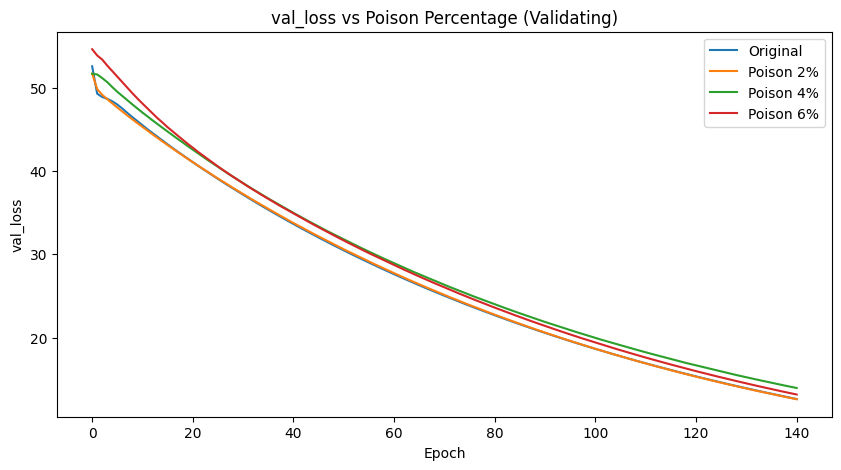

In [14]:
# 绘制val_loss的变化
plt.figure(figsize=(10, 5))
plt.plot(ll_val, label='Original')
for i in range(3):
    plt.plot(ll_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_loss vs Poison Percentage (Validating)')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

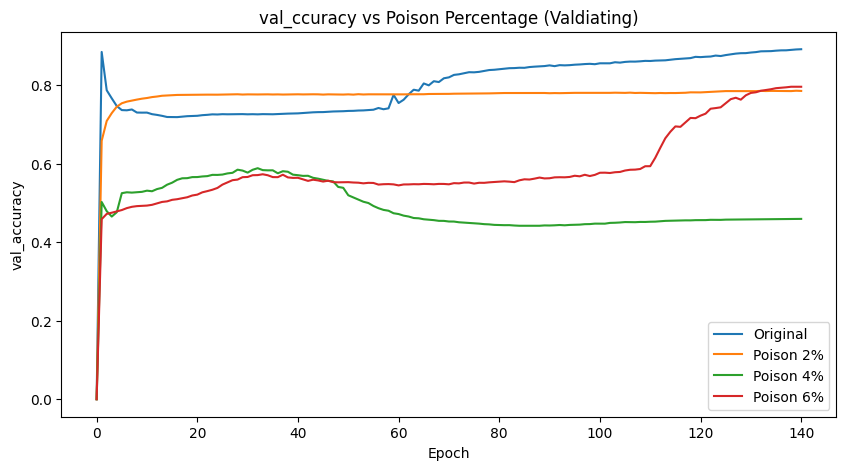

In [15]:
# 绘制val_accuracy的变化
plt.figure(figsize=(10, 5))
plt.plot(aa_val, label='Original')
for i in range(3):
    plt.plot(aa_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_ccuracy vs Poison Percentage (Valdiating)')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

In [16]:
acc_xlabel = [0, 2, 4, 6]

## 模型性能-投毒比例变化图

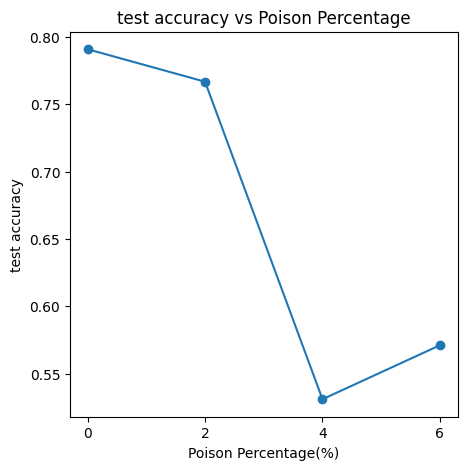

In [17]:
# 绘制accuracy随poison percentage的变化
plt.figure(figsize=(5, 5))
plt.plot(acc_xlabel, pos_acc, marker='o')
plt.title('test accuracy vs Poison Percentage')
plt.xlabel('Poison Percentage(%)')
plt.ylabel('test accuracy')
plt.xticks(acc_xlabel)
plt.show()

### 保存模型

In [22]:
import pickle

with open('mlp.pickle', 'wb') as f1:
    pickle.dump(mlp, f1)
with open('mlp_poison_2.pickle', 'wb') as f2:
    pickle.dump(mlp_poison_2, f2)
with open('mlp_poison_4.pickle', 'wb') as f3:
    pickle.dump(mlp_poison_4, f3)
with open('mlp_poison_6.pickle', 'wb') as f4:
    pickle.dump(mlp_poison_6, f4)